# Init

In [28]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, auc
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings


warnings.filterwarnings("ignore")

# Task description in English

The task is to predict **airline passenger satisfaction** based on various factors such as age, gender, customer type, class of service, flight duration and many other factors related to comfort and quality of service during the flight. We will solve the **classification** problem.

This dataset is the results of an **airline passenger satisfaction survey**, which includes various characteristics that can influence a passenger's opinion about the company.

Data: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

**Data description:**

- **Gender** - Gender of the passengers (Female, Male)
- **Customer Type** - The customer type (Loyal customer, disloyal customer)
- **Age** - The actual age of the passengers
- **Type of Travel** - Purpose of the flight of the passengers (Personal Travel, Business Travel)
- **Class** - Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- **Flight distance** - The flight distance of this journey
- **Inflight wifi service** - Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- **Departure/Arrival time convenient** - Satisfaction level of Departure/Arrival time convenient
- **Ease of Online booking** - Satisfaction level of online booking
- **Gate location** - Satisfaction level of Gate location
- **Food and drink** - Satisfaction level of Food and drink
- **Online boarding** - Satisfaction level of online boarding
- **Seat comfort** - Satisfaction level of Seat comfort
- **Inflight entertainment** - Satisfaction level of inflight entertainment
- **On-board service** - Satisfaction level of On-board service
- **Leg room service** - Satisfaction level of Leg room service
- **Baggage handling** - Satisfaction level of baggage handling
- **Check-in service** - Satisfaction level of Check-in service
- **Inflight service** - Satisfaction level of inflight service
- **Cleanliness** - Satisfaction level of Cleanliness
- **Departure Delay in Minutes** - Minutes delayed when departure
- **Arrival Delay in Minutes** - Minutes delayed when Arrival
- **Satisfaction** - Airline satisfaction level(Satisfaction, neutral or dissatisfaction)


# Опис завдання Українською

Завдання полягає у передбаченні **задоволеності пасажира авіакомпанією** на основі різних факторів, таких як вік, стать, тип клієнта, клас обслуговування, тривалість польоту та безліч інших факторів, що стосуються комфорту та якості обслуговування під час польоту. Вирішуватимемо завдання **класифікації**.

Даний датасет є результатами **опитування задоволеності пасажирів авіакомпанії**, який включає різні характеристики, які можуть впливати на думку пасажира про компанію.

Дані: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

**Опис даних:**

- **Gender** - стать пасажира (Жіноча, Чоловіча)
- **Customer Type** - тип клієнта (Лояльний клієнт, Нелояльний клієнт)
- **Age** - вік пасажира
- **Type of Travel** - мета польоту (Особиста подорож, Ділова подорож)
- **Class** - клас обслуговування (Бізнес, Економ, Економ Плюс)
- **Flight distance** - відстань польоту
- **Inflight wifi service** - задоволеність сервісом Wi-Fi на борту (0: не застосовується; 1-5)
- **Departure/Arrival time convenient** - задоволеність часом вильоту/прибуття
- **Ease of Online booking** - задоволеність процесом онлайн-бронювання
- **Gate location** - задоволеність розташуванням виходу на посадку
- **Food and drink** - задоволеність харчуванням та напоями на борту
- **Online boarding** - задоволеність процесом онлайн-реєстрації
- **Seat comfort** - задоволеність комфортом сидінь
- **Inflight entertainment** - задоволеність розважальною системою на борту
- **On-board service** - задоволеність обслуговуванням на борту
- **Leg room service** - задоволеність простором для ніг
- **Baggage handling** - задоволеність обробкою багажу
- **Check-in service** - задоволеність процесом реєстрації
- **Inflight service** - задоволеність сервісом на борту
- **Cleanliness** - задоволеність чистотою в літаку
- **Departure Delay in Minutes** - затримка вильоту за хвилини
- **Arrival Delay in Minutes** - затримка прибуття в хвилинах
- **Satisfaction** - рівень задоволеності пасажира (Задоволений, Нейтральний/Не задоволений)

# Loading data

In [3]:
# df_train = pd.read_csv('data/train.csv', index_col=[0])
# df_test = pd.read_csv('data/test.csv', index_col=[0])
df_train = pd.read_csv('../data/train.csv', index_col=0)
df_test = pd.read_csv('../data/test.csv', index_col=0)

In [4]:
print(f'Size: {df_train.shape}')
df_train.head(3)

Size: (103904, 24)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


In [5]:
print(f'Size: {df_test.shape}')
df_test.head(3)

Size: (25976, 24)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied


In [5]:
# Let's check the data information: number of gaps and data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [6]:
# Missing Values/Null Values Count
df_train.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int64  


In [8]:
# Missing Values/Null Values Count
df_test.isna().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

There are gaps in the `Arrival Delay in Minutes`

In [6]:
# Unique values ​​of the target variable
print(df_train['satisfaction'].unique())
print(df_test['satisfaction'].unique())

['neutral or dissatisfied' 'satisfied']
['satisfied' 'neutral or dissatisfied']


In [7]:
df_train.satisfaction.value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [11]:
# Duplicate Value Count
df_train[df_train.duplicated()].count()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [8]:
# Duplicate Value Count
df_test[df_test.duplicated()].count()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

# Data preprocessing

To convert a categorical target variable to a numeric one, you can use the `map()` or `replace()` method in `pandas`

In [9]:
# Transform the categorical target variable into a numeric one (0 - not satisfied, 1 - satisfied)
dict_satisfaction = {'neutral or dissatisfied': 0, 'satisfied': 1}

df_train['satisfaction'] = df_train['satisfaction'].map(dict_satisfaction)
df_test['satisfaction'] = df_test['satisfaction'].map(dict_satisfaction)

In [10]:
# Let's make sure the conversion was successful
df_train[:2]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0


In [11]:
# Remove the 'id' column as it is not needed for the model
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [12]:
# Fill in the blanks in the 'Arrival Delay in Minutes' column with the median
dict_fill = {'Arrival Delay in Minutes': df_train['Arrival Delay in Minutes'].median()}
df_train = df_train.fillna(dict_fill)
df_test = df_test.fillna(dict_fill)

# LGBMClassifier

## train/test data

In [13]:
# Divide the data into features (X) and the target variable (y)
X_train, y_train, X_test, y_test = df_train.drop(
    columns=['satisfaction']), df_train['satisfaction'], df_test.drop(
        columns=['satisfaction']), df_test['satisfaction']

In [14]:
X_train[:2]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0


In [15]:
y_train[:2]

0    0
1    0
Name: satisfaction, dtype: int64

In [16]:
X_train.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [17]:
# Convert categorical columns to type 'category' since LightGBM works better with this type
categorical_features = X_train.select_dtypes(
    object).columns.tolist()  # We select only categorical features

X_train[categorical_features] = X_train[categorical_features].apply(
    lambda col: col.astype('category'))
X_test[categorical_features] = X_test[categorical_features].apply(
    lambda col: col.astype('category'))

In [18]:
# Let's check the first lines after transforming categorical features
X_train[:2]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0


In [46]:
X_train.dtypes

Gender                               category
Customer Type                        category
Age                                     int64
Type of Travel                       category
Class                                category
Flight Distance                         int64
Inflight wifi service                   int64
Departure/Arrival time convenient       int64
Ease of Online booking                  int64
Gate location                           int64
Food and drink                          int64
Online boarding                         int64
Seat comfort                            int64
Inflight entertainment                  int64
On-board service                        int64
Leg room service                        int64
Baggage handling                        int64
Checkin service                         int64
Inflight service                        int64
Cleanliness                             int64
Departure Delay in Minutes              int64
Arrival Delay in Minutes          

## Model training

In [21]:
# Create and train the LightGBM model
clf = LGBMClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 45025, number of negative: 58879
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 103904, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


LGBMClassifier(class_weight='balanced', random_state=42)

## Saving the Model

In [ ]:
# joblib.dump(clf, '../models/lightgbm_model.joblib')

['../models/lightgbm_model.joblib']

In [30]:
clf = joblib.load('../models/lightgbm_model.joblib')

## Model Evaluation

### Model evaluation on training data

In [22]:
# ROC AUC score on training data
roc_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
print(f"ROC AUC (train): {roc_auc:.4f}")

# F1 score on training data
f1 = f1_score(y_train, clf.predict(X_train))
print(f"F1 (train): {f1:.4f}")

ROC AUC (train): 0.9960
F1 (train): 0.9611


### Model evaluation on test data

In [23]:
y_pred = clf.predict(X_test)  # Forecasts for test data
y_score = clf.predict_proba(X_test)  # Predicted probabilities

# ROC AUC score on test data
roc_auc_test = roc_auc_score(y_test, y_score[:, 1])
print(f"ROC AUC (test): {roc_auc_test:.4f}")

# F1 score on test data
f1_test = f1_score(y_test, y_pred)
print(f"F1 (test): {f1_test:.4f}")

ROC AUC (test): 0.9952
F1 (test): 0.9587


## Feature importances

In [32]:
clf.feature_importances_

array([  6, 188, 268, 170, 168, 148, 513,  69,  72, 141,  28, 165, 144,
       151,  68,  84, 167, 109, 137,  85,  31,  88], dtype=int32)

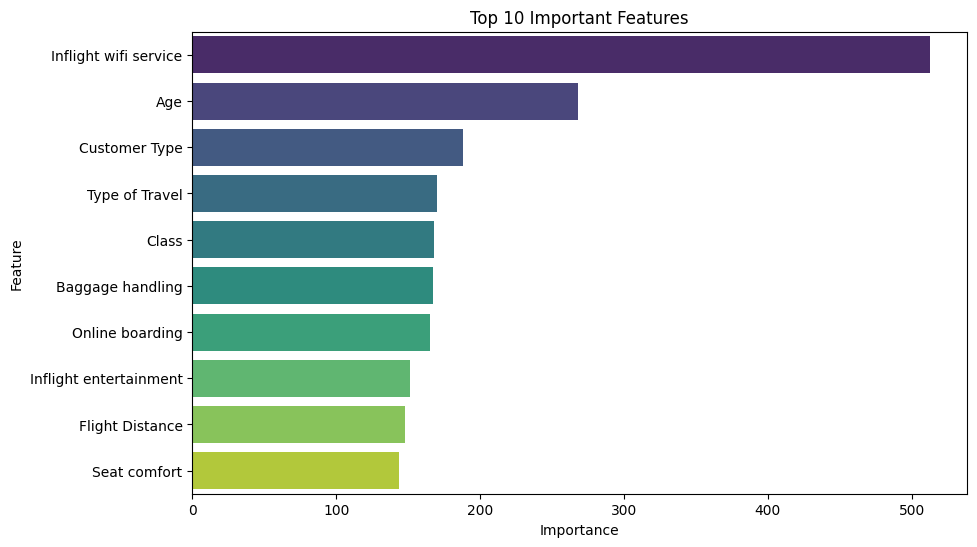

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# get the importance of features
importances = clf.feature_importances_

# create a DataFrame for convenience
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# top 10 features
top_features = feature_importance_df.head(10)

# visualize top 10 features with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
# plt.savefig("../images/confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

In [25]:
# Inflight wifi service - Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
df_train['Inflight wifi service']

0         3
1         3
2         2
3         2
4         3
         ..
103899    2
103900    4
103901    1
103902    1
103903    1
Name: Inflight wifi service, Length: 103904, dtype: int64

The availability of quality Inflight Wi-Fi serviced greatly influences the overall satisfaction rating


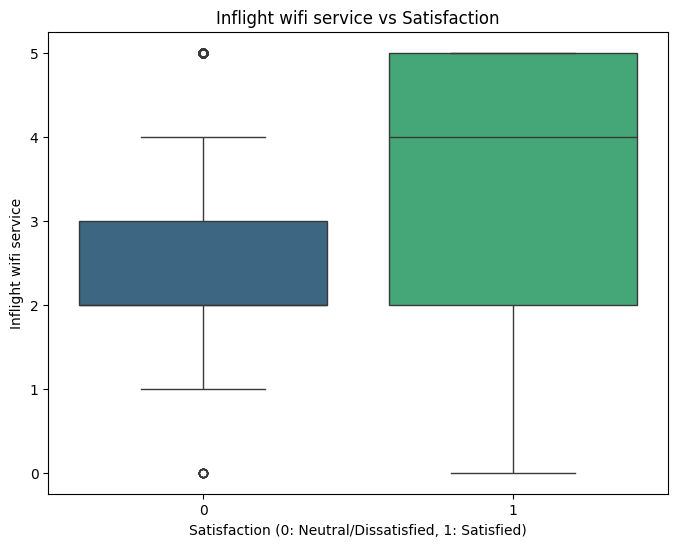

In [ ]:
print("The availability of quality Inflight Wi-Fi serviced greatly influences the overall satisfaction rating")

plt.figure(figsize=(8, 6))
sns.boxplot(x='satisfaction', y='Inflight wifi service', data=df_train, palette='viridis')
plt.title('Inflight wifi service vs Satisfaction')
plt.xlabel('Satisfaction (0: Neutral/Dissatisfied, 1: Satisfied)')
plt.ylabel('Inflight wifi service')
# plt.savefig("../images/inflight_wifi_service_vs_satisfaction.png", dpi=300, bbox_inches="tight")
plt.show()

# LogisticRegression

## Standardization

In [33]:
df_train.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1


In [34]:
df_train_ = pd.get_dummies(df_train, dtype=np.uint8)
print(df_train_.shape)

(103904, 28)


In [35]:
df_train_.head(3)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,0,0,1,1,0,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,0,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,1,1,0,1,0,1,0,1,0,0


In [36]:
features = df_train_.loc[:, df_train_.columns != 'satisfaction'].columns
features

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus'],
      dtype='object')

In [37]:
# Standardization
scaler = preprocessing.StandardScaler(copy=False)
df_train_[features] = scaler.fit_transform(df_train_[features])
df_train_.head(3)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,-1.745279,-0.731539,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,...,0,-1.015031,1.015031,0.472767,-0.472767,-1.490614,1.490614,-0.956906,-0.904327,3.586776
1,-0.951360,-0.957184,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,...,0,-1.015031,1.015031,-2.115208,2.115208,0.670865,-0.670865,1.045034,-0.904327,-0.278802
2,-0.885200,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,...,1,0.985192,-0.985192,0.472767,-0.472767,0.670865,-0.670865,1.045034,-0.904327,-0.278802


## Model training

In [39]:
lr = LogisticRegression()
lr.fit(df_train_[features],df_train_['satisfaction'])

LogisticRegression()

In [ ]:
# joblib.dump(lr, '../models/logisticregression_model.joblib')

['../models/logisticregression_model.joblib']

In [40]:
lr = joblib.load('../models/logisticregression_model.joblib')

In [41]:
# score for the first class
df_train_['y_score'] = lr.predict_proba(df_train_[features])[:,1]

In [41]:
# Do binarization (convert probabilities to 0 or 1)
df_train_['y_pred'] = (df_train_['y_score'] > 0.5)*1
df_train_.head(3)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,y_score,y_pred
0,-1.745279,-0.731539,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,...,1.015031,0.472767,-0.472767,-1.490614,1.490614,-0.956906,-0.904327,3.586776,0.200638,0
1,-0.951360,-0.957184,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,...,1.015031,-2.115208,2.115208,0.670865,-0.670865,1.045034,-0.904327,-0.278802,0.071951,0
2,-0.885200,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,...,-0.985192,0.472767,-0.472767,0.670865,-0.670865,1.045034,-0.904327,-0.278802,0.961568,1


## Confusion Matrix

In [43]:
# Manually check True positive (TP), True negative (TN), False positive (FP), False negative (FN)
def get_cm(row):
  if row['satisfaction'] == 1 and row['y_pred'] == 1:
    return 'tp'
  if row['satisfaction'] == 0 and row['y_pred'] == 0:
    return 'tn'
  if row['satisfaction'] == 1 and row['y_pred'] == 0:
    return 'fn'
  if row['satisfaction'] == 0 and row['y_pred'] == 1:
    return 'fp'

In [43]:
df_train_['cm']= df_train_.apply(get_cm,axis=1)
df_train_['cm'].value_counts()

cm
tn    53277
tp    37645
fn     7380
fp     5602
Name: count, dtype: int64

In [44]:
# Calculate the confusion_matrix
cm = confusion_matrix(df_train_['satisfaction'], df_train_['y_pred'])
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[53277  5602]
 [ 7380 37645]]


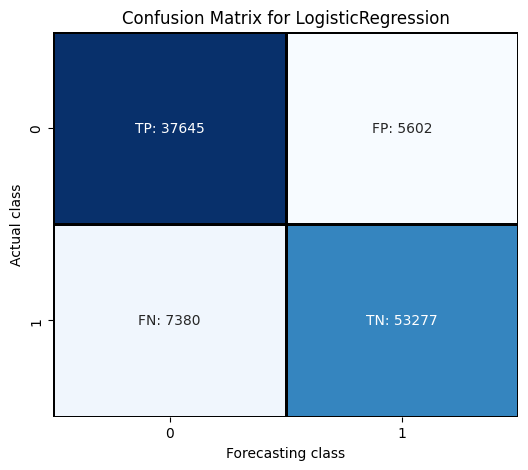

In [ ]:
# Signatures with TP, FP, FN, TN
labels = np.array([
    [f"TP: {cm[1,1]}", f"FP: {cm[0,1]}"],
    [f"FN: {cm[1,0]}", f"TN: {cm[0,0]}"]
])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=labels, fmt='', cmap="Blues", cbar=False, linewidths=1, linecolor='black',)
plt.xlabel("Forecasting class")
plt.ylabel("Actual class")
plt.title("Confusion Matrix for LogisticRegression")
# plt.savefig("../images/confusion_matrix_for_logisticregression.png", dpi=300, bbox_inches="tight")
plt.show()

## Roc Curve

- TPR (sensitivity) is the proportion of correctly found 1.
- FPR (false positive rate) is the proportion of incorrectly predicted 1.

ROC (Receiver Operating Characteristic Curve) is a graph of the dependence of True Positive Rate on False Positive Rate at different thresholds.

In [47]:
fpr, tpr, thr = roc_curve(df_train_['satisfaction'],df_train_['y_score'])
t = pd.DataFrame({'fpr':fpr, 'tpr':tpr,'thr':thr})
t

,fpr,tpr,thr
0,0.000000,0.000000,inf
1,0.000000,0.000022,0.995591
2,0.000000,0.055858,0.982421
3,0.000017,0.055858,0.982418
4,0.000017,0.082510,0.979329
...,...,...,...
19417,0.999830,0.999956,0.000371
19418,0.999830,0.999978,0.000358
19419,0.999864,0.999978,0.000304
19420,0.999864,1.000000,0.000301


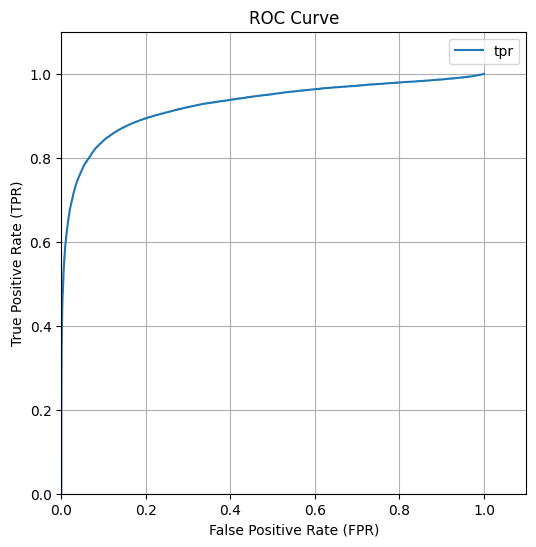

In [ ]:
t.plot(x='fpr', y='tpr', grid=True, figsize=(6,6), xlim=(0,1.1), ylim=(0,1.1))

plt.title("ROC Curve")  # Add title
plt.xlabel("False Positive Rate (FPR)")  # Label for X-axis
plt.ylabel("True Positive Rate (TPR)")  # Label for Y-axis
# plt.savefig("../images/roc_curve.png", dpi=300, bbox_inches="tight")
plt.show()  # Display the plot

## Precision, Recall и F1-score vs. Threshold

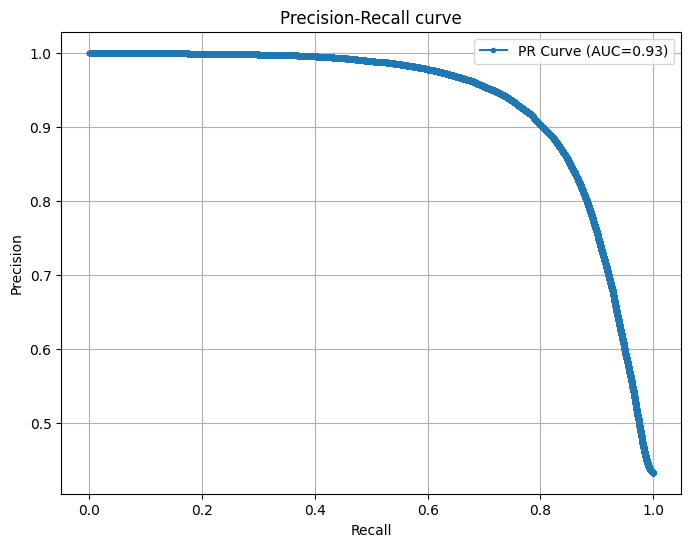

In [ ]:
# Calculate precision, recall and thresholds
precision, recall, thresholds = precision_recall_curve(df_train_['satisfaction'], df_train_['y_score']) 

# Calculate the AUC of the PR curve
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.grid()
# plt.savefig("../images/precision_recall_curve.png", dpi=300, bbox_inches="tight")
plt.show()

In [51]:
# Calculate precision, recall and thresholds
precision, recall, thresholds = precision_recall_curve(df_train_['satisfaction'], df_train_['y_score']) 

# Calculate F1-score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
f1_scores = np.nan_to_num(f1_scores)  # Remove NaNs that may appear

In [52]:
# Add a point for threshold 0 (at the beginning of the array)
thresholds = np.insert(thresholds, 0, 0)

In [53]:
print(len(thresholds))
print(len(precision))
print(len(recall))
print(len(f1_scores))

103905
103905
103905
103905


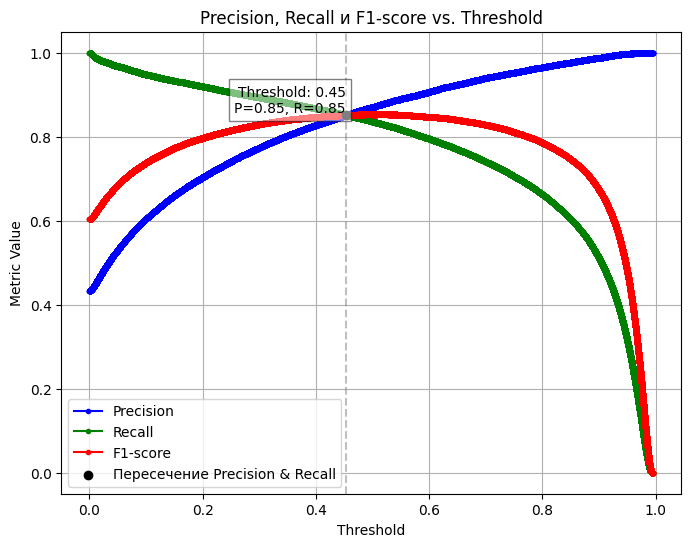

Intersection Precision & Recall:
- Threshold: 0.45
- Precision: 0.85
- Recall: 0.85
- F1-score: 0.85


In [54]:
# Find the point where precision ≈ recall
diff = np.abs(precision - recall)
best_index = np.argmin(diff)  # Minimum Difference Index

best_threshold = thresholds[best_index]
best_precision = precision[best_index]
best_recall = recall[best_index]
best_f1 = f1_scores[best_index]

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision, marker='.', label="Precision", color='blue')
plt.plot(thresholds, recall, marker='.', label="Recall", color='green')
plt.plot(thresholds, f1_scores, marker='.', label="F1-score", color='red')
# Mark the intersection point
plt.scatter(best_threshold, best_precision, color='black', label="Пересечение Precision & Recall", zorder=3)
plt.axvline(x=best_threshold, color='gray', linestyle='--', alpha=0.5)  # Vertical line for threshold

# Point Signature
plt.text(best_threshold, best_precision, 
         f'Threshold: {best_threshold:.2f}\nP={best_precision:.2f}, R={best_recall:.2f}', 
         verticalalignment='bottom', horizontalalignment='right', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Precision, Recall и F1-score vs. Threshold')
plt.legend()
plt.grid()
# plt.savefig("../images/Precision_Recall_F1-score_lr.png", dpi=300, bbox_inches="tight")
plt.show()

# Let's output the numerical values
print(f"Intersection Precision & Recall:")
print(f"- Threshold: {best_threshold:.2f}")
print(f"- Precision: {best_precision:.2f}")
print(f"- Recall: {best_recall:.2f}")
print(f"- F1-score: {best_f1:.2f}")

These results indicate that the model is performing very well at the chosen threshold of **0.45**.

Interpretation of the Metrics:
- Precision (85%) – When the model predicts a positive case, it is correct 85% of the time. This means that 15% of the positive predictions are actually false positives.

- Recall (85%) – The model successfully identifies 85% of all actual positive cases. However, it still misses 15% of the true positives (false negatives).

- F1-score (85%) – Since precision and recall are equal, the F1-score is also 0.85, meaning the balance between precision and recall is optimal.

The model makes accurate positive predictions (high precision). The model correctly identifies most positive cases (high recall). There is a good trade-off between precision and recall, making it a well-balanced model.